In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pmdarima as pmd
pd.set_option("display.max_columns",1000)

In [2]:
sales=pd.read_csv('./Productlevel_Sales_Transactions_Dataset_Weekly.csv')
sales['Price']=sales['Price'].str.replace('$','').astype(float)

In [3]:
len(np.unique(sales['Pcode']))
len(np.unique(sales['Scode']))

5

In [4]:
sales

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,Wk9,Wk10,Wk11,Wk12,Wk13,Wk14,Wk15,Wk16,Wk17,Wk18,Wk19,Wk20,Wk21,Wk22,Wk23,Wk24,Wk25,Wk26,Wk27,Wk28,Wk29,Wk30,Wk31,Wk32,Wk33,Wk34,Wk35,Wk36,Wk37,Wk38,Wk39,Wk40,Wk41,Wk42,Wk43,Wk44,Wk45,Wk46,Wk47,Wk48,Wk49,Wk50,Wk51,Wk52,Wk53,Wk54,Wk55,Wk56,Wk57,Wk58,Wk59,Wk60,Wk61,Wk62,Wk63,Wk64,Wk65,Wk66,Wk67,Wk68,Wk69,Wk70,Wk71,Wk72,Wk73,Wk74,Wk75,Wk76,Wk77,Wk78,Wk79,Wk80,Wk81,Wk82,Wk83,Wk84,Wk85,Wk86,Wk87,Wk88,Wk89,Wk90,Wk91,Wk92,Wk93,Wk94,Wk95,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,Unnamed: 107,94
0,Store1,SKU1,24.0,23,48,47,42,22,29,47,23,26,26,27,50,22,22,48,48,39,42,27,30,22,29,23,38,50,29,28,45,49,37,25,45,35,24,20,23,27,24,37,42,27,21,28,45,29,33,34,58,136,179,358,32,28,24,48,22,30,50,29,45,23,37,21,22,40,44,25,21,22,35,38,39,44,33,33,22,30,39,36,41,42,37,47,45,22,39,35,43,30,24,31,44,27,21,31,37,33,40,125,133,229,381,21,31,NaN,NaN
1,Store1,SKU2,63.0,23,22,25,40,32,26,30,50,29,40,41,29,32,35,30,20,21,31,34,40,22,46,31,44,34,24,48,26,41,23,26,44,29,21,39,48,34,32,39,36,41,45,20,24,47,24,32,66,138,328,409,29,34,39,29,22,43,46,26,24,34,37,48,41,26,34,44,38,46,43,47,50,28,34,29,41,42,22,47,30,22,26,22,31,38,41,22,41,21,45,38,47,39,21,20,20,25,50,75,95,231,590,25,33,NaN,NaN
2,Store1,SKU3,93.0,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,18,30,67,123,7,21,17,32,33,28,14,26,34,34,24,7,23,6,33,1,25,27,3,13,23,10,31,28,8,6,16,29,25,26,31,14,13,15,4,32,3,8,23,12,1,11,24,9,17,13,30,67,188,267,330,35,33,NaN,NaN
3,Store1,SKU4,48.0,50,31,50,33,26,27,42,43,24,46,35,34,28,21,21,37,32,20,28,23,26,27,46,46,22,48,43,26,50,42,29,25,30,43,44,45,25,46,48,33,20,45,40,31,22,30,43,73,204,331,339,48,25,41,43,44,44,33,41,41,30,37,29,40,49,41,47,28,24,49,35,48,49,44,20,42,34,33,34,22,43,46,39,41,45,28,35,49,28,40,38,27,46,49,31,23,26,23,92,126,205,357,30,34,NaN,NaN
4,Store1,SKU5,62.0,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,25,45,81,117,9,4,14,12,9,16,33,18,15,24,1,11,33,21,21,18,23,23,34,9,23,1,26,32,28,35,3,27,29,30,28,13,18,21,29,21,33,17,19,2,32,13,18,19,9,15,21,93,243,710,1872,33,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Store5,SKU1809,71.0,31,47,36,42,47,44,34,34,40,20,34,49,33,34,23,38,44,34,35,35,22,22,25,47,29,41,50,21,35,24,46,28,50,26,23,23,45,48,50,29,36,32,43,39,30,48,37,124,129,225,584,30,26,48,45,20,49,21,44,50,37,40,32,50,33,47,38,25,41,35,30,31,20,20,25,27,45,38,27,42,37,25,20,42,50,25,46,37,26,20,46,50,35,25,43,22,47,30,85,224,383,490,24,39,NaN,NaN
5996,Store5,SKU1563,64.0,29,24,46,32,47,26,35,44,31,30,25,47,46,44,44,33,49,24,31,41,39,40,23,50,43,21,50,37,47,34,38,31,28,41,23,34,44,22,35,34,47,45,47,37,41,29,26,124,167,314,924,34,40,20,22,23,49,47,39,38,46,44,50,34,45,30,47,30,24,23,50,29,38,39,47,30,34,34,48,20,26,26,32,31,36,33,34,42,42,26,47,36,21,20,21,33,34,27,87,167,308,796,26,24,NaN,NaN
5997,Store5,SKU897,77.0,44,43,31,35,31,22,36,39,27,27,44,29,21,20,43,32,25,24,23,36,41,43,35,44,32,40,47,23,31,21,23,20,41,44,20,31,25,25,50,39,27,48,25,40,42,45,29,146,152,230,309,32,36,39,35,35,46,34,44,26,45,32,39,38,37,23,30,47,27,20,39,21,42,43,36,28,50,26,40,40,32,39,38,37,40,36,27,50,35,47,42,21,30,49,43,39,29,35,83,137,368,499,34,28,NaN,NaN
5998,Store5,SKU1142,81.0,38,41,21,44,45,26,23,29,42,31,28,40,35,21,22,33,32,20,35,21,49,38,28,48,49,43,27,38,37,22,41,25,45,39,29,21,31,42,37,20,34,47,25,32,20,39,33,89,169,469,631,43,44,32,26,49,35,43,20,24,24,34,50,37,37,32,23,40,23,23,20,27,37,50,27,35,43,50,30,36,45,21,23,30,28,38,33,38,31,30,50,36,50,50,20,25,2

In [5]:
list(sales.columns)[3::]
cols=['Scode', 'Pcode', 'Price','Wk0', 'Wk1', 'Wk2', 'Wk3', 'Wk4', 'Wk5', 'Wk6', 'Wk7', 'Wk8', 'Wk9', 'Wk10', 'Wk11', 'Wk12', 'Wk13', 'Wk14', 'Wk15', 'Wk16', 'Wk17', 'Wk18', 'Wk19', 'Wk20', 'Wk21', 'Wk22', 'Wk23', 'Wk24', 'Wk25', 'Wk26', 'Wk27', 'Wk28', 'Wk29', 'Wk30', 'Wk31', 'Wk32', 'Wk33', 'Wk34', 'Wk35', 'Wk36', 'Wk37', 'Wk38', 'Wk39', 'Wk40', 'Wk41', 'Wk42', 'Wk43', 'Wk44', 'Wk45', 'Wk46', 'Wk47', 'Wk48', 'Wk49', 'Wk50', 'Wk51', 'Wk52', 'Wk53', 'Wk54', 'Wk55', 'Wk56', 'Wk57', 'Wk58', 'Wk59', 'Wk60', 'Wk61', 'Wk62', 'Wk63', 'Wk64', 'Wk65', 'Wk66', 'Wk67', 'Wk68', 'Wk69', 'Wk70', 'Wk71', 'Wk72', 'Wk73', 'Wk74', 'Wk75', 'Wk76', 'Wk77', 'Wk78', 'Wk79', 'Wk80', 'Wk81', 'Wk82', 'Wk83', 'Wk84', 'Wk85', 'Wk86', 'Wk87', 'Wk88', 'Wk89', 'Wk90', 'Wk91', 'Wk92', 'Wk93', 'Wk94', 'Wk95', 'Wk96', 'Wk97', 'Wk98', 'Wk99', 'Wk100', 'Wk101', 'Wk102', 'Wk103', 'Wk104', 'Wk105']
sls_cols=['Wk0', 'Wk1', 'Wk2', 'Wk3', 'Wk4', 'Wk5', 'Wk6', 'Wk7', 'Wk8', 'Wk9', 'Wk10', 'Wk11', 'Wk12', 'Wk13', 'Wk14', 'Wk15', 'Wk16', 'Wk17', 'Wk18', 'Wk19', 'Wk20', 'Wk21', 'Wk22', 'Wk23', 'Wk24', 'Wk25', 'Wk26', 'Wk27', 'Wk28', 'Wk29', 'Wk30', 'Wk31', 'Wk32', 'Wk33', 'Wk34', 'Wk35', 'Wk36', 'Wk37', 'Wk38', 'Wk39', 'Wk40', 'Wk41', 'Wk42', 'Wk43', 'Wk44', 'Wk45', 'Wk46', 'Wk47', 'Wk48', 'Wk49', 'Wk50', 'Wk51', 'Wk52', 'Wk53', 'Wk54', 'Wk55', 'Wk56', 'Wk57', 'Wk58', 'Wk59', 'Wk60', 'Wk61', 'Wk62', 'Wk63', 'Wk64', 'Wk65', 'Wk66', 'Wk67', 'Wk68', 'Wk69', 'Wk70', 'Wk71', 'Wk72', 'Wk73', 'Wk74', 'Wk75', 'Wk76', 'Wk77', 'Wk78', 'Wk79', 'Wk80', 'Wk81', 'Wk82', 'Wk83', 'Wk84', 'Wk85', 'Wk86', 'Wk87', 'Wk88', 'Wk89', 'Wk90', 'Wk91', 'Wk92', 'Wk93', 'Wk94', 'Wk95', 'Wk96', 'Wk97', 'Wk98', 'Wk99', 'Wk100', 'Wk101', 'Wk102', 'Wk103', 'Wk104', 'Wk105']
sales.columns=cols

In [6]:
for col in sls_cols:
    sales.insert(loc=len(sales.columns),column=col+'$',value=pd.Series(np.array(sales['Price'])*np.array(sales[col])))
sales
#pd.Series(np.array(sales['Price'])*np.array(sales['Wk0']))

,Scode,Pcode,Price,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,Wk9,Wk10,Wk11,Wk12,Wk13,Wk14,Wk15,Wk16,Wk17,Wk18,Wk19,Wk20,Wk21,Wk22,Wk23,Wk24,Wk25,Wk26,Wk27,Wk28,Wk29,Wk30,Wk31,Wk32,Wk33,Wk34,Wk35,Wk36,Wk37,Wk38,Wk39,Wk40,Wk41,Wk42,Wk43,Wk44,Wk45,Wk46,Wk47,Wk48,Wk49,Wk50,Wk51,Wk52,Wk53,Wk54,Wk55,Wk56,Wk57,Wk58,Wk59,Wk60,Wk61,Wk62,Wk63,Wk64,Wk65,Wk66,Wk67,Wk68,Wk69,Wk70,Wk71,Wk72,Wk73,Wk74,Wk75,Wk76,Wk77,Wk78,Wk79,Wk80,Wk81,Wk82,Wk83,Wk84,Wk85,Wk86,Wk87,Wk88,Wk89,Wk90,Wk91,Wk92,Wk93,Wk94,Wk95,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,Wk104,Wk105,Wk0$,Wk1$,Wk2$,Wk3$,Wk4$,Wk5$,Wk6$,Wk7$,Wk8$,Wk9$,Wk10$,Wk11$,Wk12$,Wk13$,Wk14$,Wk15$,Wk16$,Wk17$,Wk18$,Wk19$,Wk20$,Wk21$,Wk22$,Wk23$,Wk24$,Wk25$,Wk26$,Wk27$,Wk28$,Wk29$,Wk30$,Wk31$,Wk32$,Wk33$,Wk34$,Wk35$,Wk36$,Wk37$,Wk38$,Wk39$,Wk40$,Wk41$,Wk42$,Wk43$,Wk44$,Wk45$,Wk46$,Wk47$,Wk48$,Wk49$,Wk50$,Wk51$,Wk52$,Wk53$,Wk54$,Wk55$,Wk56$,Wk57$,Wk58$,Wk59$,Wk60$,Wk61$,Wk62$,Wk63$,Wk64$,Wk65$,Wk66$,Wk67$,Wk68$,Wk69$,Wk70$,Wk71$,Wk72$,Wk73$,Wk74$,Wk75$,Wk76$,Wk77$,Wk78$,Wk79$,Wk80$,Wk81$,Wk82$,Wk83$,Wk84$,Wk85$,Wk86$,Wk87$,Wk88$,Wk89$,Wk90$,Wk91$,Wk92$,Wk93$,Wk94$,Wk95$,Wk96$,Wk97$,Wk98$,Wk99$,Wk100$,Wk101$,Wk102$,Wk103$,Wk104$,Wk105$
0,Store1,SKU1,24.0,23,48,47,42,22,29,47,23,26,26,27,50,22,22,48,48,39,42,27,30,22,29,23,38,50,29,28,45,49,37,25,45,35,24,20,23,27,24,37,42,27,21,28,45,29,33,34,58,136,179,358,32,28,24,48,22,30,50,29,45,23,37,21,22,40,44,25,21,22,35,38,39,44,33,33,22,30,39,36,41,42,37,47,45,22,39,35,43,30,24,31,44,27,21,31,37,33,40,125,133,229,381,21,31,NaN,NaN,552.0,1152.0,1128.0,1008.0,528.0,696.0,1128.0,552.0,624.0,624.0,648.0,1200.0,528.0,528.0,1152.0,1152.0,936.0,1008.0,648.0,720.0,528.0,696.0,552.0,912.0,1200.0,696.0,672.0,1080.0,1176.0,888.0,600.0,1080.0,840.0,576.0,480.0,552.0,648.0,576.0,888.0,1008.0,648.0,504.0,672.0,1080.0,696.0,792.0,816.0,1392.0,3264.0,4296.0,8592.0,768.0,672.0,576.0,1152.0,528.0,720.0,1200.0,696.0,1080.0,552.0,888.0,504.0,528.0,960.0,1056.0,600.0,504.0,528.0,840.0,912.0,936.0,1056.0,792.0,792.0,528.0,720.0,936.0,864.0,984.0,1008.0,888.0,1128.0,1080.0,528.0,936.0,840.0,1032.0,720.0,576.0,744.0,1056.0,648.0,504.0,744.0,888.0,792.0,960.0,3000.0,3192.0,5496.0,9144.0,504.0,744.0,NaN,NaN
1,Store1,SKU2,63.0,23,22,25,40,32,26,30,50,29,40,41,29,32,35,30,20,21,31,34,40,22,46,31,44,34,24,48,26,41,23,26,44,29,21,39,48,34,32,39,36,41,45,20,24,47,24,32,66,138,328,409,29,34,39,29,22,43,46,26,24,34,37,48,41,26,34,44,38,46,43,47,50,28,34,29,41,42,22,47,30,22,26,22,31,38,41,22,41,21,45,38,47,39,21,20,20,25,50,75,95,231,590,25,33,NaN,NaN,1449.0,1386.0,1575.0,2520.0,2016.0,1638.0,1890.0,3150.0,1827.0,2520.0,2583.0,1827.0,2016.0,2205.0,1890.0,1260.0,1323.0,1953.0,2142.0,2520.0,1386.0,2898.0,1953.0,2772.0,2142.0,1512.0,3024.0,1638.0,2583.0,1449.0,1638.0,2772.0,1827.0,1323.0,2457.0,3024.0,2142.0,2016.0,2457.0,2268.0,2583.0,2835.0,1260.0,1512.0,2961.0,1512.0,2016.0,4158.0,8694.0,20664.0,25767.0,1827.0,2142.0,2457.0,1827.0,1386.0,2709.0,2898.0,1638.0,1512.0,2142.0,2331.0,3024.0,2583.0,1638.0,2142.0,2772.0,2394.0,2898.0,2709.0,2961.0,3150.0,1764.0,2142.0,1827.0,2583.0,2646.0,1386.0,2961.0,1890.0,1386.0,1638.0,1386.0,1953.0,2394.0,2583.0,1386.0,2583.0,1323.0,2835.0,2394.0,2961.0,2457.0,1323.0,1260.0,1260.0,1575.0,3150.0,4725.0,5985.0,14553.0,37170.0,1575.0,2079.0,NaN,NaN
2,Store1,SKU3,93.0,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,18,30,67,123,7,21,17,32,33,28,14,26,34,34,24,7,23,6,33,1,25,27,3,13,23,10,31,28,8,6,16,29,25,26,31,14,13,15,4,32,3,8,23,12,1,11,24,9,17,13,30,67,188,267,330,35,33,NaN,NaN,651.0,1023.0,744.0,837.0,930.0,744.0,651.0,1209.0,1116.0,558.0,1302.0,837.0,372.0,651.0,1116.0,744.0,651.0,1023.0,930.0,651.0,651.0,1209.0,1023.0,744.0,930.0,744.0,1302.0,465.0,279.0,1209.0,1023.0,837.0,651.0,744.0,651.0,837.0,558.0,1116.0,1116.0,837.0,279.0,465.0,558.0,1302.0,465.0,465.0,651.0,1674.0,2790.0,6231.0,11439.0,651.0,1953.0,1581.0,2976.0,3069.0,2604.0,1302.0,2418.0,3162.0,3162.0,2232.0,651.0,2139.0,558.0,3069.0,9

In [7]:
s1_sum=pd.DataFrame(sales[sales['Scode']=='Store1'].iloc[:,109:].sum(axis=0))
s2_sum=pd.DataFrame(sales[sales['Scode']=='Store2'].iloc[:,109:].sum(axis=0))
s3_sum=pd.DataFrame(sales[sales['Scode']=='Store3'].iloc[:,109:].sum(axis=0))
s4_sum=pd.DataFrame(sales[sales['Scode']=='Store4'].iloc[:,109:].sum(axis=0))
s5_sum=pd.DataFrame(sales[sales['Scode']=='Store5'].iloc[:,109:].sum(axis=0))

In [8]:
s1_sum.columns=['actuals']
s2_sum.columns=['actuals']
s3_sum.columns=['actuals']
s4_sum.columns=['actuals']
s5_sum.columns=['actuals']

In [9]:
np.log(s1_sum.iloc[:-2,:])

,actuals
Wk0$,13.769685
Wk1$,13.780195
Wk2$,13.786813
Wk3$,13.804779
Wk4$,13.801145
...,...
Wk99$,15.954127
Wk100$,16.644418
Wk101$,17.344314
Wk102$,14.137534


In [10]:
s1_arim=pmd.auto_arima(np.log(s1_sum.iloc[:-2,:]),seasonal=True,D=1,m=52)
s1_arim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  104
Model:             SARIMAX(0, 1, 0, 52)   Log Likelihood                 -37.327
Date:                  Sat, 11 Sep 2021   AIC                             78.654
Time:                          13:28:39   BIC                             82.557
Sample:                               0   HQIC                            80.150
                                  - 104                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3771      0.110      3.427      0.001       0.161       0.593
sigma2         0.2460      0.020     12.122      0.000       0.206       0.286
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1723.36
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):             427.71   Skew:                            -4.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
res1=pd.DataFrame(s1_arim.predict(n_periods=26,return_conf_int=True,alpha=.25))
res1=res1.T
forecast1=res1
forecast1.columns=['forecast','int']
low=[]
high=[]
for itm in forecast1['int']:
    low.append(itm[0])
    high.append(itm[1])
forecast1['low']=low
forecast1['high']=high
forecast1.drop('int',axis=1,inplace=True)
f1=forecast1.applymap(np.exp)

In [77]:
s1_sum.iloc[:-2,:]

lst_f1=[]
for x in range(104,130):
    lst_f1.append('Wk'+str(x)+'$')
lst_f1
f1.index=lst_f1
f1
f1_act=s1_sum.iloc[:-2,:]
f1_act['actuals'].nlargest(5)
f1

,forecast,low,high
Wk104$,1.999055e+06,1.129824e+06,3.537029e+06
Wk105$,2.027925e+06,1.146141e+06,3.588110e+06
Wk106$,2.039565e+06,1.152720e+06,3.608706e+06
Wk107$,1.997179e+06,1.128764e+06,3.533709e+06
Wk108$,2.035621e+06,1.150491e+06,3.601728e+06
Wk109$,2.020224e+06,1.141788e+06,3.574484e+06
Wk110$,2.036604e+06,1.151046e+06,3.603467e+06
Wk111$,2.051691e+06,1.159573e+06,3.630162e+06
Wk112$,2.024523e+06,1.144218e+06,3.582092e+06
Wk113$,2.010821e+06,1.136474e+06,3.557848e+06


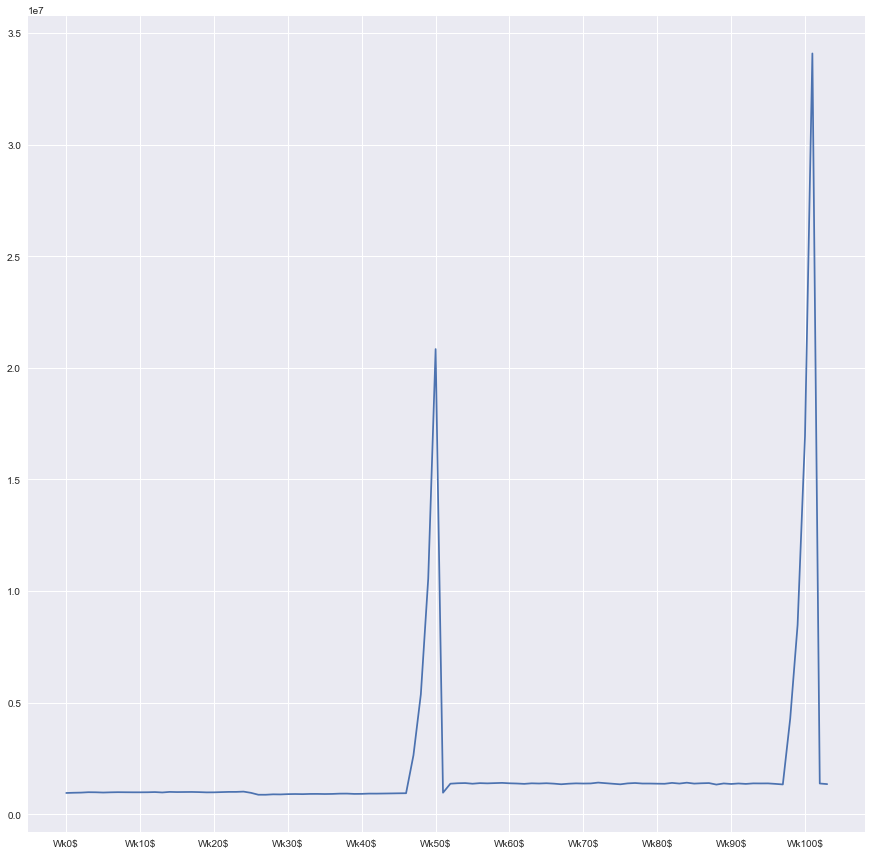

In [78]:
ys=list(pd.concat((pd.Series(f1_act.index),pd.Series(f1.index))))
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.plot(s1_sum.index[:-2],s1_sum.iloc[:-2,:])
# plt.plot(f1.index,f1['forecast'],color='r')
# plt.fill_between(f1.index,f1['low'],f1['high'],alpha=.35,color='g')
xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 10 != 0:
        xticks[i].set_visible(False)
plt.show()


In [12]:
s2_arim=pmd.auto_arima(np.log(s2_sum.iloc[:-2,:]),seasonal=True,D=1,m=52)
s2_arim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  104
Model:             SARIMAX(0, 1, 0, 52)   Log Likelihood                 -41.412
Date:                  Sat, 11 Sep 2021   AIC                             84.825
Time:                          13:29:06   BIC                             86.776
Sample:                               0   HQIC                            85.573
                                  - 104                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2879      0.014     20.163      0.000       0.260       0.316
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1988.87
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):            1063.90   Skew:                            -4.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
res2=pd.DataFrame(s2_arim.predict(n_periods=12,return_conf_int=True,alpha=.25))
res2=res2.T
forecast2=res2
forecast2.columns=['forecast','int']
low=[]
high=[]
for itm in forecast2['int']:
    low.append(itm[0])
    high.append(itm[1])
forecast2['low']=low
forecast2['high']=high
forecast2.drop('int',axis=1,inplace=True)
forecast2.applymap(np.exp)

,forecast,low,high
0,2819168.0,1.520738e+06,5.226218e+06
1,2573677.0,1.388313e+06,4.771123e+06
2,2658035.0,1.433818e+06,4.927507e+06
3,2603959.0,1.404648e+06,4.827260e+06
4,2643829.0,1.426155e+06,4.901172e+06
5,2645250.0,1.426922e+06,4.903806e+06
6,2680212.0,1.445781e+06,4.968619e+06
7,2612401.0,1.409202e+06,4.842910e+06
8,2656415.0,1.432944e+06,4.924504e+06
9,2798870.0,1.509789e+06,5.188589e+06


In [14]:
s3_arim=pmd.auto_arima(np.log(s3_sum.iloc[:-2,:]),seasonal=True,D=1,m=52)
s3_arim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  104
Model:             SARIMAX(0, 1, 0, 52)   Log Likelihood                 -34.727
Date:                  Sat, 11 Sep 2021   AIC                             71.454
Time:                          13:29:36   BIC                             73.406
Sample:                               0   HQIC                            72.202
                                  - 104                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2226      0.011     20.539      0.000       0.201       0.244
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              2204.07
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):            6700.21   Skew:                            -4.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
res3=pd.DataFrame(s3_arim.predict(n_periods=12,return_conf_int=True,alpha=.25))
res3=res3.T
forecast3=res3
forecast3.columns=['forecast','int']
low=[]
high=[]
for itm in forecast3['int']:
    low.append(itm[0])
    high.append(itm[1])
forecast3['low']=low
forecast3['high']=high
forecast3.drop('int',axis=1,inplace=True)
forecast3.applymap(np.exp)

,forecast,low,high
0,4122840.0,2.395910e+06,7.094511e+06
1,4151533.0,2.412584e+06,7.143886e+06
2,4179022.0,2.428559e+06,7.191188e+06
3,4132086.0,2.401283e+06,7.110422e+06
4,4206816.0,2.444711e+06,7.239016e+06
5,4117946.0,2.393066e+06,7.086090e+06
6,4139457.0,2.405567e+06,7.123105e+06
7,4129882.0,2.400002e+06,7.106629e+06
8,4116590.0,2.392278e+06,7.083756e+06
9,4127638.0,2.398698e+06,7.102768e+06


In [16]:
s4_arim=pmd.auto_arima(np.log(s4_sum.iloc[:-2,:]),seasonal=True,D=1,m=52)
s4_arim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  104
Model:             SARIMAX(0, 1, 0, 52)   Log Likelihood                 -36.558
Date:                  Sat, 11 Sep 2021   AIC                             75.116
Time:                          13:30:06   BIC                             77.067
Sample:                               0   HQIC                            75.864
                                  - 104                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2389      0.012     20.333      0.000       0.216       0.262
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              2126.11
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):            9964.43   Skew:                            -4.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
res4=pd.DataFrame(s4_arim.predict(n_periods=12,return_conf_int=True,alpha=.25))
res4=res4.T
forecast4=res4
forecast4.columns=['forecast','int']
low=[]
high=[]
for itm in forecast4['int']:
    low.append(itm[0])
    high.append(itm[1])
forecast4['low']=low
forecast4['high']=high
forecast4.drop('int',axis=1,inplace=True)
forecast4.applymap(np.exp)

,forecast,low,high
0,2903605.0,1.654866e+06,5.094626e+06
1,2914430.0,1.661035e+06,5.113619e+06
2,2896527.0,1.650832e+06,5.082207e+06
3,2893851.0,1.649307e+06,5.077512e+06
4,2890881.0,1.647614e+06,5.072301e+06
5,2921726.0,1.665194e+06,5.126421e+06
6,2866986.0,1.633995e+06,5.030375e+06
7,2885747.0,1.644688e+06,5.063293e+06
8,2922654.0,1.665722e+06,5.128049e+06
9,2890735.0,1.647531e+06,5.072044e+06


In [18]:
s5_arim=pmd.auto_arima(np.log(s5_sum.iloc[:-2,:]),seasonal=True,D=1,m=52)
s5_arim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  104
Model:             SARIMAX(0, 1, 0, 52)   Log Likelihood                 -36.437
Date:                  Sat, 11 Sep 2021   AIC                             74.874
Time:                          13:30:35   BIC                             76.826
Sample:                               0   HQIC                            75.622
                                  - 104                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2378      0.012     20.389      0.000       0.215       0.261
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              2138.26
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):           10824.88   Skew:                            -4.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
res5=pd.DataFrame(s5_arim.predict(n_periods=12,return_conf_int=True,alpha=.25))
res5=res5.T
forecast5=res5
forecast5.columns=['forecast','int']
low=[]
high=[]
for itm in forecast5['int']:
    low.append(itm[0])
    high.append(itm[1])
forecast5['low']=low
forecast5['high']=high
forecast5.drop('int',axis=1,inplace=True)
forecast5.applymap(np.exp)

,forecast,low,high
0,2908960.0,1.660079e+06,5.097376e+06
1,2890960.0,1.649807e+06,5.065834e+06
2,2907896.0,1.659472e+06,5.095511e+06
3,2877805.0,1.642300e+06,5.042783e+06
4,2897700.0,1.653654e+06,5.077645e+06
5,2891234.0,1.649964e+06,5.066314e+06
6,2881380.0,1.644340e+06,5.049047e+06
7,2924545.0,1.668973e+06,5.124685e+06
8,2921669.0,1.667332e+06,5.119646e+06
9,2895698.0,1.652511e+06,5.074137e+06


In [20]:
by_prod=pd.concat((sales.iloc[:,1],sales.iloc[:,3:107]),axis=1)
grp=by_prod.iloc[:,1::].columns
grp_sum=by_prod.groupby('Pcode')[grp].agg(sum)
grp_sum['ttl']=np.sum(grp_sum.iloc[:,1::],axis=1)
grp_sum.reset_index(inplace=True)
grp_sum[['Pcode','ttl']].sort_values(by='ttl',ascending=False)
ccc=sum(grp_sum['ttl'])
grp_sum['pct_ttl']=(grp_sum['ttl']/ccc)
grp_sum.sort_values(by='pct_ttl',ascending=False)
grp_sum['cum_sum']=np.cumsum(np.array(grp_sum['pct_ttl']))
grp_sum[grp_sum['cum_sum']<.5]

,Pcode,Wk0,Wk1,Wk2,Wk3,Wk4,Wk5,Wk6,Wk7,Wk8,Wk9,Wk10,Wk11,Wk12,Wk13,Wk14,Wk15,Wk16,Wk17,Wk18,Wk19,Wk20,Wk21,Wk22,Wk23,Wk24,Wk25,Wk26,Wk27,Wk28,Wk29,Wk30,Wk31,Wk32,Wk33,Wk34,Wk35,Wk36,Wk37,Wk38,Wk39,Wk40,Wk41,Wk42,Wk43,Wk44,Wk45,Wk46,Wk47,Wk48,Wk49,Wk50,Wk51,Wk52,Wk53,Wk54,Wk55,Wk56,Wk57,Wk58,Wk59,Wk60,Wk61,Wk62,Wk63,Wk64,Wk65,Wk66,Wk67,Wk68,Wk69,Wk70,Wk71,Wk72,Wk73,Wk74,Wk75,Wk76,Wk77,Wk78,Wk79,Wk80,Wk81,Wk82,Wk83,Wk84,Wk85,Wk86,Wk87,Wk88,Wk89,Wk90,Wk91,Wk92,Wk93,Wk94,Wk95,Wk96,Wk97,Wk98,Wk99,Wk100,Wk101,Wk102,Wk103,ttl,pct_ttl,cum_sum
0,SKU1,358,403,450,349,360,352,423,358,419,357,366,388,385,352,389,397,375,417,377,374,355,398,313,362,304,369,349,388,333,391,376,467,378,393,374,393,371,423,349,351,433,346,376,415,386,375,373,1076,2024,4414,6700,357,360,349,410,386,288,370,329,436,400,282,344,340,380,403,392,364,331,303,382,387,389,423,356,407,324,361,362,427,314,373,386,337,302,348,353,354,348,340,347,442,370,459,379,422,358,414,1169,2161,4368,8081,318,353,65384,0.001410,0.001410
1,SKU10,577,582,494,525,609,512,500,500,618,589,483,554,547,432,618,592,563,554,510,526,572,495,540,543,606,520,515,612,532,520,546,566,594,538,531,494,564,610,574,464,584,611,501,571,472,558,523,1328,2388,4786,8884,592,447,581,505,516,616,533,529,618,554,572,438,526,595,534,578,626,493,489,513,485,559,497,585,543,631,548,550,542,599,544,554,510,497,569,506,443,601,561,515,525,583,481,609,549,548,521,1507,3333,6646,12519,481,609,93055,0.002006,0.003416
2,SKU100,337,429,333,376,434,403,364,403,385,410,447,403,377,408,443,451,374,379,444,417,413,378,421,432,433,367,322,363,474,304,392,295,360,407,365,337,356,372,367,460,366,418,401,356,354,348,403,1194,2672,5679,10385,335,426,425,414,389,413,439,429,433,371,437,326,363,428,425,421,418,450,346,311,391,400,371,426,455,440,380,443,390,437,377,380,399,420,465,427,461,362,361,398,391,393,431,362,345,444,359,1056,1938,4560,7415,426,420,72596,0.001565,0.004981
3,SKU1000,107,108,104,116,95,125,133,127,118,140,134,104,138,103,124,123,128,120,140,123,129,119,139,106,130,155,146,109,129,139,130,120,123,129,137,148,120,120,101,133,117,142,131,137,143,151,129,432,1089,1967,4649,121,140,133,142,143,117,145,152,119,122,122,145,134,151,115,102,137,129,124,135,115,142,142,118,154,110,149,113,133,134,119,117,104,126,119,104,140,130,147,128,128,141,111,106,100,126,139,299,730,1198,2418,114,151,24885,0.000536,0.005517
4,SKU1001,81,79,99,93,79,99,94,83,101,78,92,85,84,84,98,86,80,76,87,101,99,82,98,79,80,85,109,90,93,103,82,84,89,90,95,76,100,109,84,99,73,81,73,89,84,110,98,287,499,793,1289,80,84,94,91,101,88,96,82,79,107,84,89,83,76,95,85,91,104,98,97,82,81,80,87,85,98,98,90,96,97,87,82,96,76,83,77,86,79,81,73,92,103,81,83,78,97,94,147,246,504,1041,102,79,13245,0.000286,0.005803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,SKU350,70,89,134,78,98,141,91,129,135,84,164,162,151,124,110,137,153,157,132,114,188,151,87,162,152,73,172,166,173,106,137,170,138,185,87,100,137,168,144,101,93,139,139,130,149,101,127,489,1367,2115,4363,113,164,149,129,82,131,142,101,117,122,105,171,187,155,101,177,111,125,153,122,175,152,166,143,156,135,122,175,126,140,115,182,143,115,170,116,169,104,125,122,122,96,176,137,147,137,177,585,954,2371,4860,85,98,29845,0.000643,0.495001
1138,SKU351,187,218,220,201,180,142,183,178,238,221,199,198,258,140,220,179,176,208,261,242,253,183,225,183,251,210,194,251,163,189,123,180,229,212,166,238,106,159,176,202,237,199,204,174,234,252,251,614,1442,3170,7334,169,133,254,182,163,176,247,154,271,185,168,195,283,241,214,248,218,194,237,227,159,176,200,181,199,237,204,172,282,193,176,246,277,179,173,158,265,214,188,190,208,148,2

In [21]:
by_prod2=pd.concat((sales.iloc[:,1],sales.iloc[:,109:-2]),axis=1)
by_prod2
grp2=by_prod2.iloc[:,1::].columns
grp_sum2=by_prod2.groupby('Pcode')[grp2].agg(sum)
grp_sum2['ttl']=np.sum(grp_sum2.iloc[:,1::],axis=1)
grp_sum2.reset_index(inplace=True)
grp_sum2[['Pcode','ttl']].sort_values(by='ttl',ascending=False)
ccc=sum(grp_sum2['ttl'])
grp_sum2['pct_ttl']=(grp_sum2['ttl']/ccc)
grp_sum2.sort_values(by='pct_ttl',ascending=False)
grp_sum2['cum_sum']=np.cumsum(np.array(grp_sum2['pct_ttl']))
grp_sum2[grp_sum2['cum_sum']<.5]

,Pcode,Wk0$,Wk1$,Wk2$,Wk3$,Wk4$,Wk5$,Wk6$,Wk7$,Wk8$,Wk9$,Wk10$,Wk11$,Wk12$,Wk13$,Wk14$,Wk15$,Wk16$,Wk17$,Wk18$,Wk19$,Wk20$,Wk21$,Wk22$,Wk23$,Wk24$,Wk25$,Wk26$,Wk27$,Wk28$,Wk29$,Wk30$,Wk31$,Wk32$,Wk33$,Wk34$,Wk35$,Wk36$,Wk37$,Wk38$,Wk39$,Wk40$,Wk41$,Wk42$,Wk43$,Wk44$,Wk45$,Wk46$,Wk47$,Wk48$,Wk49$,Wk50$,Wk51$,Wk52$,Wk53$,Wk54$,Wk55$,Wk56$,Wk57$,Wk58$,Wk59$,Wk60$,Wk61$,Wk62$,Wk63$,Wk64$,Wk65$,Wk66$,Wk67$,Wk68$,Wk69$,Wk70$,Wk71$,Wk72$,Wk73$,Wk74$,Wk75$,Wk76$,Wk77$,Wk78$,Wk79$,Wk80$,Wk81$,Wk82$,Wk83$,Wk84$,Wk85$,Wk86$,Wk87$,Wk88$,Wk89$,Wk90$,Wk91$,Wk92$,Wk93$,Wk94$,Wk95$,Wk96$,Wk97$,Wk98$,Wk99$,Wk100$,Wk101$,Wk102$,Wk103$,ttl,pct_ttl,cum_sum
0,SKU1,13577.0,15141.0,17058.0,12229.0,13036.0,12160.0,14621.0,11925.0,15556.0,11904.0,14241.0,13707.0,13592.0,13899.0,13612.0,12970.0,13706.0,16615.0,14760.0,14979.0,11005.0,14714.0,9850.0,11966.0,9599.0,12434.0,10404.0,14219.0,9808.0,13668.0,13258.0,18580.0,14491.0,12902.0,12702.0,15649.0,13148.0,16561.0,12197.0,13218.0,16487.0,11920.0,14350.0,14953.0,16138.0,14181.0,11673.0,42743.0,72878.0,152573.0,243124.0,12454.0,11324.0,13315.0,14526.0,13699.0,9260.0,13565.0,12055.0,17465.0,15958.0,9639.0,11517.0,12176.0,13040.0,14840.0,12400.0,14297.0,11458.0,9726.0,13640.0,13043.0,13788.0,14393.0,12935.0,15974.0,11993.0,11166.0,12457.0,16662.0,10055.0,13980.0,12022.0,11743.0,9778.0,11524.0,13507.0,13817.0,13396.0,12296.0,9867.0,15705.0,13470.0,18546.0,14629.0,16553.0,14172.0,14848.0,45652.0,83690.0,167043.0,322899.0,10780.0,12047.0,2397888.0,0.000941,0.000941
1,SKU10,30279.0,31571.0,25111.0,29414.0,33056.0,26294.0,26762.0,26433.0,32101.0,32925.0,26504.0,30661.0,28151.0,22058.0,33624.0,31679.0,28235.0,29344.0,26186.0,29613.0,31935.0,27124.0,27381.0,28177.0,31181.0,27999.0,28074.0,34201.0,29604.0,28127.0,28715.0,30449.0,33555.0,28814.0,28821.0,25520.0,28719.0,32829.0,31065.0,23809.0,30455.0,32633.0,26816.0,29809.0,25067.0,29384.0,30080.0,75902.0,129536.0,253952.0,466734.0,30897.0,22281.0,32219.0,26234.0,27195.0,31324.0,29514.0,27927.0,31827.0,29837.0,28973.0,22710.0,26837.0,31952.0,28341.0,30904.0,31213.0,25857.0,27189.0,27263.0,24923.0,31158.0,26235.0,32029.0,28303.0,33651.0,30096.0,29461.0,29682.0,30250.0,29956.0,31402.0,28104.0,24814.0,30247.0,27191.0,24075.0,33524.0,30670.0,28008.0,27201.0,29806.0,25422.0,31413.0,29587.0,29977.0,27588.0,79283.0,164845.0,336868.0,611573.0,25434.0,31028.0,4870487.0,0.001912,0.002853
2,SKU100,22435.0,28540.0,23371.0,26261.0,28494.0,28534.0,26653.0,25952.0,23994.0,25808.0,29894.0,27250.0,27835.0,28432.0,27808.0,27788.0,27858.0,25014.0,30273.0,26278.0,27866.0,25305.0,26479.0,29363.0,27374.0,27378.0,22927.0,27482.0,29891.0,21948.0,29160.0,20775.0,24464.0,29802.0,26016.0,25259.0,22587.0,25989.0,24579.0,31030.0,28122.0,26023.0,26817.0,22395.0,26032.0,22662.0,30170.0,82372.0,182108.0,392513.0,673577.0,23794.0,26372.0,28439.0,29051.0,27010.0,25909.0,29748.0,29716.0,30282.0,26882.0,31211.0,23012.0,25936.0,28383.0,28773.0,28140.0,30732.0,29553.0,23041.0,22057.0,25566.0,27788.0,24776.0,27319.0,28938.0,30211.0,23728.0,28851.0,27685.0,27991.0,26330.0,24020.0,24482.0,31062.0,31244.0,27251.0,29561.0,24994.0,24277.0,28854.0,24971.0,28699.0,30563.0,24704.0,25582.0,28914.0,25927.0,68828.0,131583.0,320382.0,515829.0,28511.0,27768.0,4929732.0,0.001935,0.004788
3,SKU1000,6030.0,6444.0,6139.0,6449.0,5766.0,6522.0,7141.0,6861.0,6511.0,6911.0,7182.0,5997.0,7500.0,5890.0,6828.0,7266.0,7053.0,6837.0,7136.0,6685.0,6952.0,6182.0,6877.0,6508.0,6524.0,7839.0,7311.0,5867.0,7203.0,6788.0,7488.0,6893.0,6919.0,6837.0,6776.0,7455.0,6216.0,6467.0,5832.0,7042.0,5998.0,7227.0,7278.0,7083.0,7023.0,7402.0,7167.0,21909.0,59943.0,93195.0,234837.0,6871.0,7033.0,7389.0,7006.0,6957.0,6140.0,7118.0,7654.0,7004.0,6647.0,6542.0,6913.0,7585.0,7402.0,6257.0,5866.0,7053.0,6391.0,6303.0,7021.0,6775.0,7237.0,7475.0,5933.0,7696.0,5746.0,7773.0,6406.0,7032.0,6892.0,7057.0,6219.0,5713.0,6761.0,6317.0,6288.0,7354.0,6765.0,7355.0,6948.0,6713.0,7011.0,6374.0,6029.0,5854.0,6767.0,7138.0,14682.0,38638.0,71637.0,147620.0,6381.0,74